## Лабораторная работа 5. Анимация качения треугольника Рело по квадрату

Орешко Алёна Владимировна, 14.04.2025

## Задание 5.1. Начальное положение треугольника Рело и квадрата

In [3]:
import math
import numpy as np
import matplotlib.pyplot as plt
import relo
n = 3
center = np.array([0., 0.])
r = 10.0
N = 100
relo_matrix = relo.regular_polygon_Relo(r=r, center=center, N=N)

Построение матрицы square для покоординатного описания границы квадрата.

In [6]:
side = r  # сторона квадрата равна ширине треугольника
square_ps = []
square = np.array([
    [-side/2, -side/2],
    [side/2, -side/2],
    [side/2, side/2], 
    [-side/2, side/2],
    [-side/2, -side/2]
])
for i in range(4):
    start = square[i]
    end = square[i + 1]
    x_vals = np.linspace(start[0], end[0], N)
    y_vals = np.linspace(start[1], end[1], N)
    for x, y in zip(x_vals, y_vals):
        square_ps.append([x, y])
sq = np.array(square_ps)

(-5.750000000000004, 10.75, -9.526279441628825, 9.526279441628827)

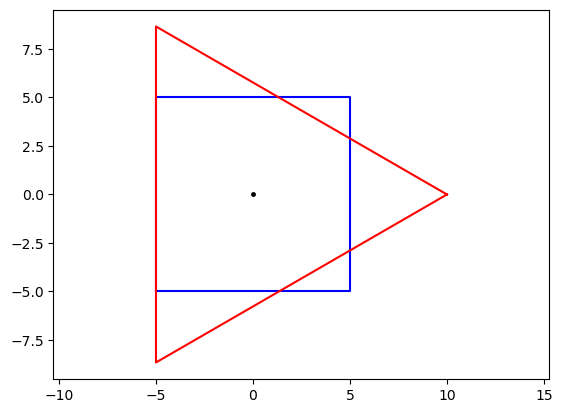

In [8]:
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

Вектор сдвига $shift$:

$ shift = R - r/2 = r*(1/√3 - 1/2) $

R=r/ √3 - радиус описанной окружности; 

r - ширина треугольника Рёло(равна стороне квадрата)

In [10]:
shift = [r * (1/np.sqrt(3) - 0.5), 0]   # сдвиг по оси X
relo_matrix_shifted = relo_matrix - shift
center -= shift
print(shift)

[0.7735026918962584, 0]


После сдвига:

(-6.523502691896263, 9.976497308103742, -9.526279441628825, 9.526279441628827)

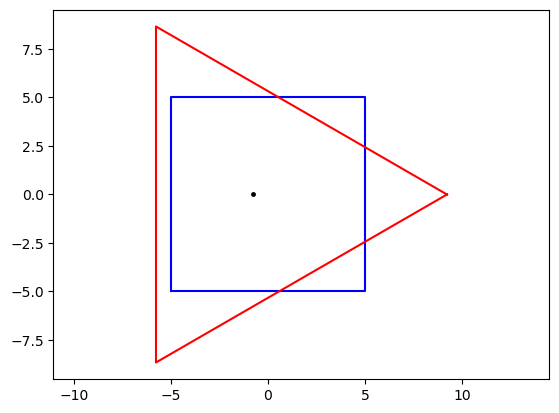

In [12]:
plt.figure()
plt.plot(sq[:,0], sq[:,1], 'b-')
plt.plot(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1], 'r-')
plt.plot(center[0],center[1],'k.',markersize=5)
plt.axis('equal')

## Задание 5.2. Анимация поступательного движения треугольника Рело по окружности

(-6.523502691896263, 9.976497308103742, -9.526279441628825, 9.526279441628827)

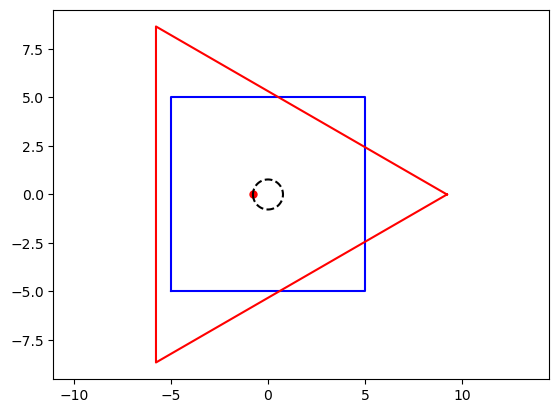

In [14]:
N_frames = 100
t_center = np.linspace(-np.pi, np.pi, N_frames)
center_frame = shift[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
frame = 0
relo_matrix_shifted = relo_matrix + center_frame[frame]
plt.figure()
plt.plot(sq[:,0],sq[:,1],'b-')
plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')
plt.axis('equal')

Напишите пользовательскую функцию трех аргументов draw_frame(r, N_frames, frame), которая изображает кадр с номером frame при поступательном движении центра треугольника Рело по окружности против часовой стрелки.

Аргумент r задает ширину треугольника Рело.

Аргумент N_frames задает количество кадров для прохождения центром треугольника Рело полной окружности.

Аргумент frame задает номер кадра; по умолчанию frame=0.

Функция осуществляет визуализацию и не возвращает объекты. Для функции draw_frame укажите аннотации типов и оформите строки документации.

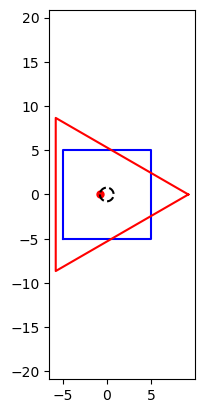

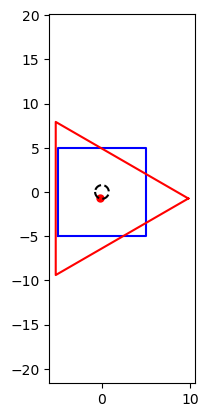

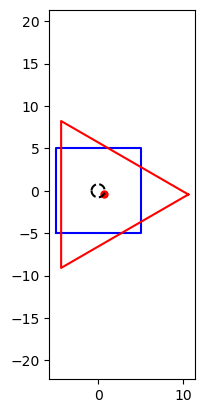

<Figure size 640x480 with 0 Axes>

In [16]:
def draw_frame(r, N_frames, frame=0):
    """
    Отрисовывает кадр с номером `frame` при поступательном движении центра треугольника Рело по окружности против часовой стрелки.

    Параметры:
    - r (int): Ширина треугольника Рело.
    - N_frames (int): Количество кадров анимации.
    - frame (int, по умолчанию 0): Номер кадра.
    - square: Массив координат квадрата.
    - relo_matrix: Массив координат (N×2).
    """

    shift = [r * (1/np.sqrt(3) - 0.5), 0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
    relo_matrix_shifted = relo_matrix + center_frame[frame]
    
    plt.plot(sq[:,0],sq[:,1],'b-')
    plt.plot(relo_matrix_shifted[:,0],relo_matrix_shifted[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    plt.axis('equal')
    plt.figure()
N_frames = 100

plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)

plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)

plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

In [17]:
import matplotlib.animation as anim
%matplotlib widget
from matplotlib.animation import FuncAnimation

Реализуйте анимацию поступательного движения треугольника Рело по окружности против часовой стрелки. При построении анимации возьмите за основу функцию draw_frame, но не используйте ее напрямую в качестве аргумента функции FuncAnimation (модуль animation библиотеки matplotlib).

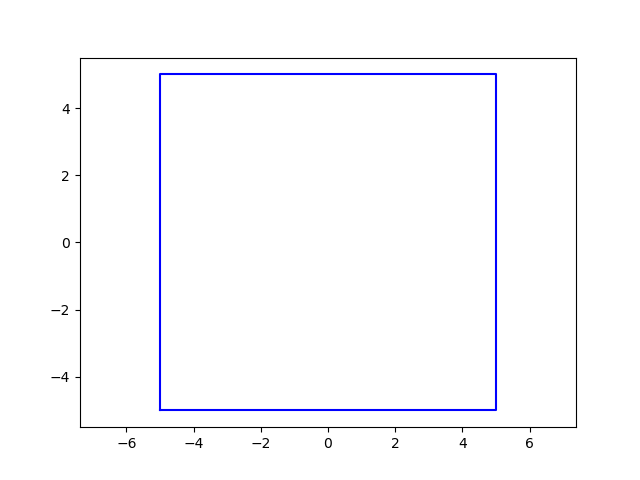

In [19]:
fig1 = plt.figure()
ax1 = plt.axes()
line1, = ax1.plot(square[:,0], square[:,1], 'b-') # для графика функции
line2, = ax1.plot([], [], 'go') # для точки
line3, = ax1.plot([], [], 'r-')

def at_frame(point):
    line2.set_data([point[0]], [point[1]])
    relo_matrix_shifted = relo_matrix + point
    line3.set_data(relo_matrix_shifted[:,0], relo_matrix_shifted[:,1])

def init():
    global line2
    line1, = ax1.plot(square[:,0], square[:,1], 'b-') # графика функции
    line3, = ax1.plot([], [], 'r-')
    line2, = ax1.plot([], [], 'go') # для точки
    line4, = ax1.plot(center_frame[0,0], center_frame[0,1], 'r.', markersize=10)
    line5, = ax1.plot(center_frame[:,0], center_frame[:,1], 'k--')

plt.axis('equal')

FuncAnimation(fig1, at_frame, frames=center_frame, init_func=init,repeat=False, interval=20)

## Задание 5.3. Анимация качения треугольника Рело

In [21]:
rotate_matrix = lambda theta: np.array([[np.cos(theta), np.sin(theta)],
                                        [-np.sin(theta), np.cos(theta)]])
rotate_matrix(np.pi)

array([[-1.0000000e+00,  1.2246468e-16],
       [-1.2246468e-16, -1.0000000e+00]])

(-11.000000000000002, 11.0, -9.526279441628825, 9.526279441628827)

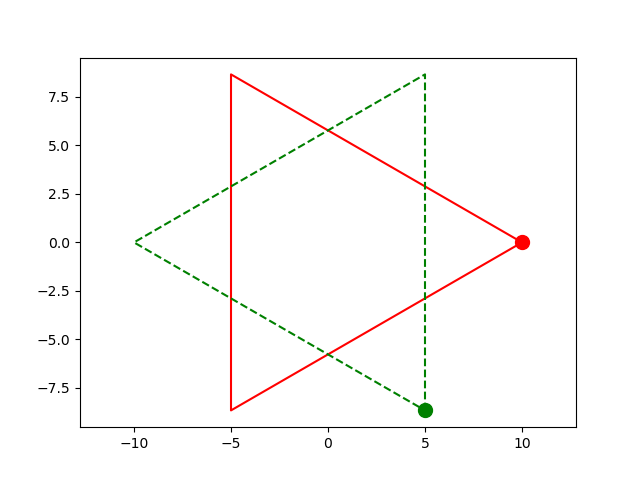

In [22]:
theta = np.pi/3
matrix = rotate_matrix(theta)
relo_matrix_rotated = np.array([np.dot(matrix,row) for row in relo_matrix])
plt.figure()

plt.plot(relo_matrix[:,0],relo_matrix[:,1],'r-')
plt.plot(relo_matrix[0,0],relo_matrix[0,1],'r.',markersize=20)

plt.plot(relo_matrix_rotated[:,0],relo_matrix_rotated[:,1],'g--')
plt.plot(relo_matrix_rotated[0,0],relo_matrix_rotated[0,1],'g.',markersize=20)

plt.axis('equal')

(-9.20629248517155, 9.75015123974906, -7.371845253644926, 10.000589286155154)

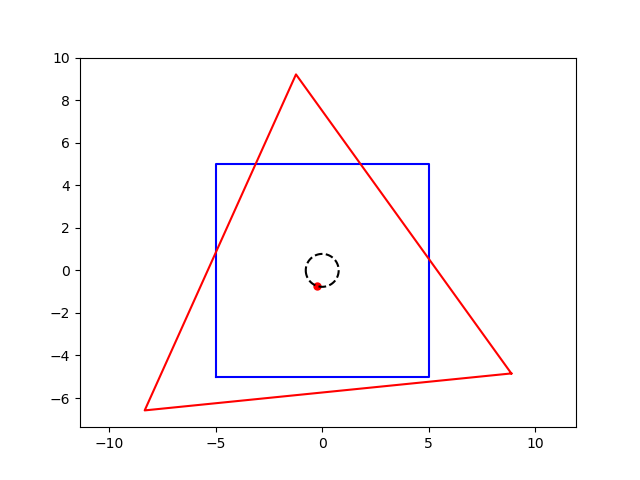

In [23]:
theta = np.linspace(0, 2*np.pi/3, N_frames)
frame = 20

matrix = rotate_matrix(theta[frame])
relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
                       + center_frame[frame])

plt.figure()
plt.plot(square[:,0],square[:,1],'b-')
plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
plt.plot(center_frame[:,0],center_frame[:,1],'k--')

plt.axis('equal')

Измените пользовательскую функцию draw_frame(r, N_frames, frame), чтобы создавалось изображение кадра с номером frame для анимации качения треугольника Рело по квадрату.

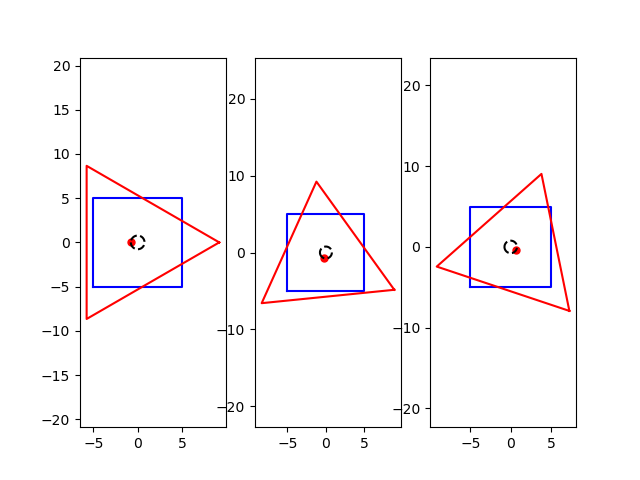

In [25]:
def draw_frame(r, N_frames, frame=0):
    shift = [r * (1/np.sqrt(3) - 0.5), 0]
    t_center = np.linspace(-np.pi, np.pi, N_frames)
    center_frame = shift[0] * np.transpose([np.cos(t_center), np.sin(t_center)])
    theta = np.linspace(0, 2 * np.pi/3, N_frames)
    matrix = rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix,row) for row in relo_matrix])
                           + center_frame[frame])
    
    plt.plot(square[:,0],square[:,1],'b-')
    plt.plot(relo_matrix_changed[:,0],relo_matrix_changed[:,1],'r-')
    plt.plot(center_frame[frame,0],center_frame[frame,1],'r.',markersize=10)
    plt.plot(center_frame[:,0],center_frame[:,1],'k--')
    
    plt.axis('equal')
plt.figure()

plt.subplot(1,3,1)
draw_frame(r=r, N_frames=N_frames)

plt.subplot(1,3,2)
draw_frame(r=r, N_frames=N_frames, frame=20)

plt.subplot(1,3,3)
draw_frame(r=r, N_frames=N_frames, frame=40)

Реализуйте анимацию качения треугольника Рело против часовой стрелки. При построении анимации возьмите за основу функцию draw_frame, но не используйте ее напрямую в качестве аргумента функции FuncAnimation (модуль animation библиотеки matplotlib).

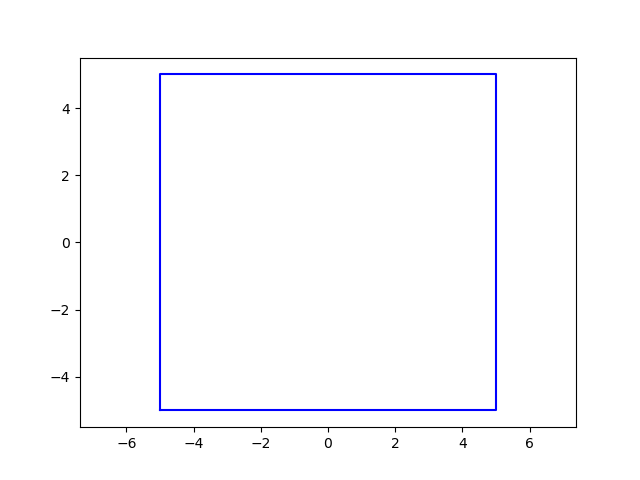

In [27]:
plt.close('all')
fig2 = plt.figure()
ax2 = plt.axes()
line1, = ax2.plot(square[:,0], square[:,1], 'b-')
line2, = ax2.plot([], [], 'go') 
line3, = ax2.plot([], [], 'r-')

def at_frame2(frame):
    global center_frame
    point = center_frame[frame]
    line2.set_data([point[0]], [point[1]])
    matrix=rotate_matrix(theta[frame])
    relo_matrix_changed = (np.array([np.dot(matrix, row) for row in relo_matrix])
                           + point)
    line3.set_data(relo_matrix_changed[:,0], relo_matrix_changed[:,1])

def init2():
    global line2
    global line3
    line1, = ax2.plot(square[:,0], square[:,1], 'b-')
    line3, = ax2.plot([], [], 'r-')
    line2, = ax2.plot([], [], 'go') 
    line4, = ax2.plot(center_frame[0,0], center_frame[0,1], 'r.', markersize=10)
    line5, = ax2.plot(center_frame[:,0], center_frame[:,1], 'k--')

plt.axis('equal')

FuncAnimation(fig2, at_frame2, frames=range(N_frames), init_func=init2,repeat=False, interval=20)